## Higgs Effective Field Theory: Spectra
Created: Feb 12, 2024 Nicola de Filippis, Kurtis Johnson, Harrison B. Prosper<br>

### Introduction 
The notebook plots distributions of the cross section per 15 GeV bin in the di-Higgs mass, $m_{gg}$, for a few hundred points in the parameter space of the
Higgs effective field theory (HEFT). The HEFT is defined by the 5D parameter space of Wilson coefficients[1],
\begin{align}
    \theta & = c_{hhh}, c_t, c_{tt}, c_{ggh}, c_{gghh},
\end{align}
and the cross section (per $m_{gg}$ bin) is given by[1]
\begin{align}
    \sigma(m_{gg}, \theta)
    & = a_{1} c_{t}^{4} + a_{2} c_{tt}^{2} + a_{3} c_{t}^{2} c_{hhh}^{2} + a_{4} c_{ggh}^{2} c_{hhh}^{2}
    \nonumber\\
    & + a_{5} c_{gghh}^{2} + a_{6} c_{t}^{2} c_{tt} + a_{7} c_{t}^{3} c_{hhh} 
    \nonumber\\
    & + a_{8} c_{t} c_{hhh} c_{tt} + a_{9} c_{ggh} c_{hhh} c_{tt} + a_{10} c_{gghh} c_{tt} 
    \nonumber\\ 
    & + a_{11} c_{t}^{2} c_{ggh} c_{hhh} + a_{12} c_{t}^{2} c_{gghh} 
    \nonumber\\
    & + a_{13} c_{t} c_{ggh} c_{hhh}^{2} + a_{14} c_{t} c_{gghh} c_{hhh} \nonumber\\
    & + a_{15} c_{gghh} c_{ggh} c_{hhh} + a_{16} c_{t}^{3} c_{ggh} \nonumber\\
    & + a_{17} c_{t} c_{ggh} c_{tt} + a_{18} c_{t} c_{ggh}^{2} c_{hhh}  \nonumber\\
    & + a_{19} c_{t} c_{gghh} c_{ggh} + a_{20} c_{t}^{2} c_{ggh}^{2}  \nonumber\\ 
    & + a_{21} c_{ggh}^{2} c_{tt} + a_{22} c_{ggh}^{3} c_{hhh} \nonumber\\
    & + a_{23} c_{gghh} c_{ggh}^{2} , 
\end{align}
where the coefficients $a_i$ depend on the di-Higgs mass $m_{hh}$. In this investigation, we set $c_{hhh} = c_t = 1$, which reduces the parameter space to 3 dimensions (note, in the csv file `klambda` is a synonym for $c_{hhh}$). With this restriction, the cross section *per 15 GeV* of the di-Higgs mass simplifies to
\begin{align}
    \sigma(m_{gg}, \theta) & = \boldsymbol{c}^T(\theta) \cdot \boldsymbol{b}(m_{hh}), 
\end{align}
where
\begin{align}
    \boldsymbol{c}^T(\theta) & = (1, 
                 c_{tt}, 
             c_{ggh}, 
             c_{gghh}, \nonumber\\
             &\quad\,\,\,\, c_{tt} c_{ggh},
             c_{tt} c_{gghh}, 
             c_{ggh}c_{gghh}, \nonumber\\
             &\quad\,\,\,\, c_{tt} c_{ggh}^2, 
             c_{gghh} c_{ggh}^2, 
             c_{tt}^2, 
             c_{gghh}^2, 
             c_{ggh}^2, 
             c_{ggh}^3), 
\end{align}
is a row matrix
and $\boldsymbol{b}(m_{hh})$ is a column matrix of coefficients, formed from the original coefficients $a_i$.

### References
  1. Lina Alasfar *et al.*, arXiv:2304.01968v1.

In [1]:
import os, sys

# the standard module for tabular data
import pandas as pd

# the standard module for array manipulation
import numpy as np

# the standard modules for high-quality plots
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# update fonts
FONTSIZE = 14
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# set usetex = False if LaTex is not 
# available on your system or if the 
# rendering is too slow
mp.rc('text', usetex=True)

### Load data

Note: $\kappa_\lambda \equiv c_{hhh}$.

In [3]:
def read_data(datafiles):
    df = []
    for datafile in datafiles:
        print('reading %s' % datafile)
        df.append( pd.read_csv(datafile) )

    # concatenate dataframes
    df = pd.concat(df)
    
    # select points with klambda=CT=1
    select = (df.klambda==1) * (df.CT==1)
    
    # make number of rows be a multiple of 20
    total  = select.sum()
    total  = int(total / 20)
    total  = 20 * total
    
    df = df[select][:total]
    print('\nnumber of rows read: %d\n' % len(df))

    # randomly shuffle order of rows in dataframe
    df = df.sample(frac=1).reset_index(drop=True)
    return df

In [4]:
datafiles = ['../data/powheg_total_param_closeBP.csv', 
             '../data/powheg_total_param_closeBP_all.csv']

df = read_data(datafiles)
df[:5]

reading ../data/powheg_total_param_closeBP.csv
reading ../data/powheg_total_param_closeBP_all.csv

number of rows read: 340



,klambda,CT,CTT,CGHH,CGGHH,0,1,2,3,4,...,92,93,94,95,96,97,98,99,100,101
0,1.0,1.0,-1.0,0.1333,0.3333,0.0,0.0,0.0,0.0,0.0,...,0.001372,0.001116,0.001616,0.002119,0.001372,0.001743,0.001117,0.000998,0.000622,0.034763
1,1.0,1.0,0.5,-0.6000,-0.2000,0.0,0.0,0.0,0.0,0.0,...,0.000466,0.000460,0.000412,0.000381,0.000371,0.000313,0.000416,0.000282,0.000362,0.009184
2,1.0,1.0,-1.5,0.0000,0.2666,0.0,0.0,0.0,0.0,0.0,...,0.001637,0.001639,0.003009,0.002464,0.001371,0.002185,0.002189,0.001637,0.001368,0.041548
3,1.0,1.0,-1.5,-0.6000,1.0000,0.0,0.0,0.0,0.0,0.0,...,0.007225,0.009139,0.008718,0.008507,0.007442,0.009348,0.006804,0.005950,0.007017,0.188449
4,1.0,1.0,0.5,-0.6000,1.0000,0.0,0.0,0.0,0.0,0.0,...,0.006189,0.006825,0.006028,0.005236,0.003653,0.006188,0.005902,0.006345,0.004919,0.144802


### Convert to $\texttt{numpy}$ arrays

In [5]:
def get_column_names(df, first='17', last='96'):
    # get column names
    columns = list(df.columns)
    params  = columns[2:5]
    
    firstbin= columns.index(first)
    lastbin = columns.index(last)
    
    bins = columns[firstbin:lastbin+1]
    return params, bins

params, bins = get_column_names(df)

params, bins[0], bins[-1], len(bins)

(['CTT', 'CGHH', 'CGGHH'], '17', '96', 80)

In [6]:
# get Wilson coefficients
wilson = df[params].to_numpy()
print(wilson.shape)

# get bin data
hists = df[bins].to_numpy()
print(hists.shape)

(340, 3)
(340, 80)


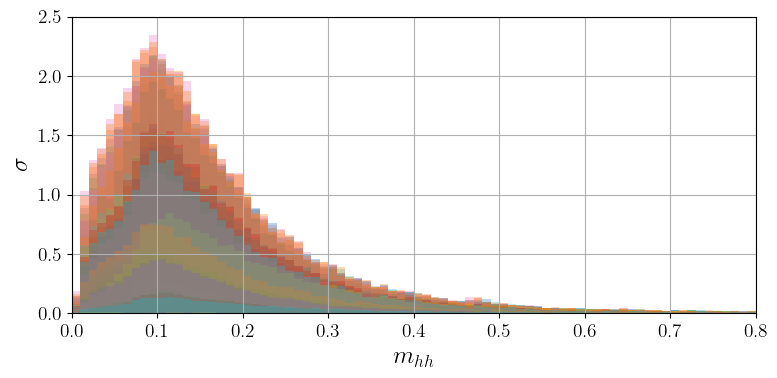

In [9]:
def plot_spectra(d, filename='fig_mhh.pdf', fgsize=(8, 4), ftsize=18):

    # compute mid-points of bins and map mhh to unit interval
    N, xbins = d.shape
    xmin, xmax = 0, xbins/100
    x = np.linspace(xmin, xmax, xbins+1)
    # x[1:] = x[1], x[2] ...,x[n-1]
    # x[:-1]= x[0], x[1],...,x[n-2]
    x = (x[1:]+x[:-1])/2

    # make a plot with a single figure
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=fgsize)

    ax.set_xlim(xmin, xmax)
    ax.set_xlabel(r'$m_{hh}$', fontsize=ftsize)

    ymin, ymax = 0, 2.5
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel(r'$\sigma$', fontsize=ftsize)

    # loop over HEFT points
    for y in d:
        ax.hist(x, weights=y, bins=xbins, range=(xmin, xmax), alpha=0.3)
        
    ax.grid() 
    
    plt.tight_layout()
    plt.savefig(filename)

plot_spectra(hists)